# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But 1) I'll know that you know what's really going on, and 2) you'll know you can do it, because 2a) someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...), or maybe because you're working on something important and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But, for now, let's set up a KNNClassifier class.

In [2]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
        self._X = X
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        #counts = dict({1:0,-1:0})
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
    
        unique, freq = np.unique(self._y, return_counts=True)
        counts = dict(zip(unique, freq))
        
        #END Workspace 1.1
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        #BEGIN Workspace 1.2
        #TODO: Determine majority, assign it to label
        label_list = []
        
        for num in np.nditer(indices):
            label_list.append(self._y.reshape(1,-1)[0,num])    #reshape and get labels from our data
            
            
        unique_2, freq_2 = np.unique(np.asarray(label_list), return_counts=True)
        label_dict = dict(zip(unique_2, freq_2)) 
        vals=list(label_dict.values())
        maxval = max(vals)
        max_list = [key for key in label_dict.keys() if label_dict[key] == maxval]
        
        if len(max_list) == 1:
            label =  max_list[0]
        else:
            unique_3, freq_3 = np.unique(self._y, return_counts=True)
            counts_3 = dict(zip(unique_3, freq_3))
            v=list(counts_3.values())
            k=list(counts_3.keys())
            label = k[v.index(max(v))]
        #END Workspace 1.2
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k into the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        ans = 0
        #BEGIN Workspace 1.3
        #TODO: perform classification of point here
        dist, pt_index = self._model.query(point.reshape(1,-1), self._k)        
        ans = self.majority(pt_index)
        #HINT: use the majority function created above
        #HINT: use the euclidian distance discussed in lecture to find nearest neighbors
        #END Workspace 1.3
        return(ans)
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        #C = np.array([])
        #BEGIN Workspace 1.4
        N = len(np.unique(self._y, return_counts=False))
        ind = np.unique(self._y)
        C = np.array(np.zeros(shape=(N,N)))
        
    
        pred = []                         #get predictions for test set
        for pt in np.arange(len(testX)):
            pred.append(self.classify(testX[pt]))
        pred_array = np.array([pred])
        
        
        #pred_test = zip(testY, pred_array)

        list1=[]
        list2=[]

        for item in np.nditer(pred_array):
            list1.append(np.where(item == ind)[0][0])      #appends index for predictions

        for item2 in np.nditer(testY):
            list2.append(np.where(item2 == ind)[0][0])      #appends index for test

        pred_test = zip(list1,list2)

        for item3, item4 in pred_test:                  #adds one at specifiec index   
            C[item3][item4] += 1

        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        #END Workspace 1.4
        return(C)
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        return(score)

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points (10 each)

1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification

You can take a look at the unit tests below to see how we create data to input into our classifier, what kinds of things we expect as output, etc. You should also consider expanding the test cases to make sure your classifier is working correctly.


In [3]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([[1, -1, -1, 1, -1, 1, -1]])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
        
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
        #BEGIN Workspace
        #Add more tests as desired
        #END Workspace
    
    #BEGIN Workspace
    #Add more test functions as desired
    #def testmajority(self):
       # ind1 = np.array([[0]])
        #ind3 = np.array([[0,2]])
        #ind3 = np.array([[0,2,5]])
        #self.assertEqual(self.knnfive.majority(ind1))
    #HINT - You'll want to make sure each of your functions from the KNNClassifier class you created work correctly...
    #END Workspace
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [33]:

class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        np.random.seed(42)
        #BEGIN Workspace 2.1
        self.train_x = np.array([]) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array([]) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array([]) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array([]) # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        train = np.array(digits['data'])
        target = np.array(digits['target'])

        rand_nums = np.random.randint(low=0, high=len(train), size=len(train))
        #train_len = int(round(len(train)*0.8))
        train_len = int(round(len(rand_nums)*0.8,0))
        self.train_x = train[rand_nums[:train_len]]
        self.test_x = train[rand_nums[train_len:]]
        self.train_y = target[rand_nums[:train_len]]
        self.test_y = target[rand_nums[train_len:]]
        #END Workspace 2.1
      
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        print("Size of training examples:", len(self.train_x))
        print("Size of training answers:", len(self.train_y))
        print("Size of testing set examples:", len(self.test_x))
        print("Size of testing set answers:", len(self.test_y))
        print("Number of pixels in each image:", self.test_x[0].shape[0] )
        #END Workspace 2.2
        

    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion matrix for test data
        knn5_digits = KNNClassifier(self.train_x, self.train_y, k=5)
        conf_matrix = knn5_digits.confusionMatrix(self.test_x,self.test_y)
        return(conf_matrix)
        #END Workspace 2.3
        
    def viewDigit(self, digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        
        

In [34]:
num = Numbers()
num_conf = num.classify()
num_conf

array([[29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.],
       [ 0.,  0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 27.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 35.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 33.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 41.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 34.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 43.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 34.]])

*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

1 confused for 8 ( 2 time(s))


<Figure size 432x288 with 0 Axes>

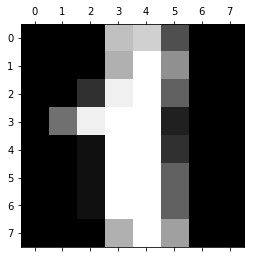

<Figure size 432x288 with 0 Axes>

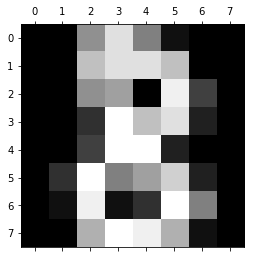

9 confused for 5 ( 1 time(s))


<Figure size 432x288 with 0 Axes>

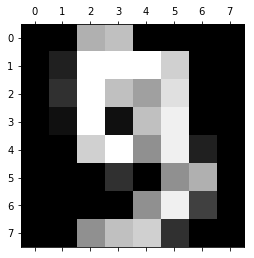

<Figure size 432x288 with 0 Axes>

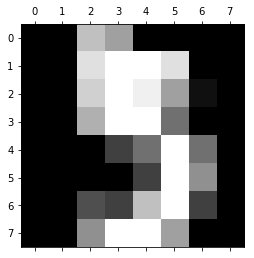

In [35]:
#BEGIN 3.1a
#TODO: Print out problem class images
digits = sklearn.datasets.load_digits()

size = len(num_conf)

for i in np.arange(size):
    for j in np.arange(size):
        if i!=j:
            if num_conf[i][j] >= 1:
                print(i, "confused for", j,"(", int(num_conf[i][j]),"time(s))")
                num.viewDigit(digits['images'][i])
                num.viewDigit(digits['images'][j])        
#END 3.1a

#### 3.1b
TODO: Write description of misclassification

I think the main cause for numbers being missclasified are the similarities in features between the numbers. For example, in my most recent run (since I left the random seed out) 8 was classified as 9 two times. This can be due the similar ring structures at the top of the number and the "tail" of 9 almost looks like a ring that would form an 8. The 9 would only need 2 more pixel locations to be populated with values in order to look like an "8". We can extend this concept to other features like 1 and 7 because both have very similar shapes but a "7" can be interpreted as a "slanted 1".

In [7]:
class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        np.random.seed(42)
        #BEGIN Workspace 3.3a
        self.train_x = np.array([]) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array([]) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array([]) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array([]) # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        train = np.array(digits['data'])
        target = np.array(digits['target'])

        rand_nums = np.random.randint(low=0, high=len(train), size=len(train))
        #train_len = int(round(len(train)*trainPercentage))
        train_len = int(round(len(rand_nums)*trainPercentage,0))
        self.train_x = train[rand_nums[:train_len]]
        self.test_x = train[rand_nums[train_len:]]
        self.train_y = target[rand_nums[:train_len]]
        self.test_y = target[rand_nums[train_len:]]
        #END Workspace 3.3a

    def classify(self, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 3.2a
        #TODO: Create classifier from training data (using k nearest neighbors), generate confusion matrix for test data
        knnx_digits = KNNClassifier(self.train_x, self.train_y, k)
        conf_matrix = knnx_digits.confusionMatrix(self.test_x,self.test_y)
        return(conf_matrix)
        #HINT: You can copy your own work from the original Numbers class
        #END Workspace 3.2a
        
    def viewDigit(digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()

[0.99721, 0.98607, 0.98886, 0.98607, 0.99164, 0.98886, 0.98886, 0.9805, 0.961, 0.96379, 0.95265, 0.93315]


Text(0, 0.5, 'Accuracy')

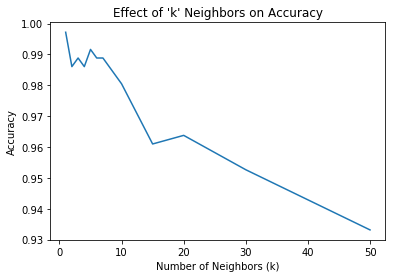

In [8]:
nn = [1,2,3,4,5,6,7,10,15,20,30,50]
num2 = Numbers2(0.8)
acc_nn = []
for item in nn:
    item_conf = num2.classify(item)
    score_nn = round(np.sum(item_conf.diagonal()) / item_conf.sum(),5)
    acc_nn.append(score_nn)

print(acc_nn)
plt.plot(nn, acc_nn)
plt.title("Effect of 'k' Neighbors on Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")


#### 3.2b
TODO: Write description of influence of neighbor count
In general it looks like the model is most accurate at lower neighbor counts (k) and decreases as k increases. This could be due to the fact that as k increases we are considering too many numbers that may look similar but are not that of the point we are testing. For example, if we are looking at the number 5 and are considering k=5 neighbors, we are most likely looking at neighbors that are in fact 5. However, when we increase the number to k=50, we may be looking at a lot of 5's but we may also be looking at a lof of 9's and 2's. In this case we would say the model is underfitting to the data.

Text(0, 0.5, 'Accuracy')

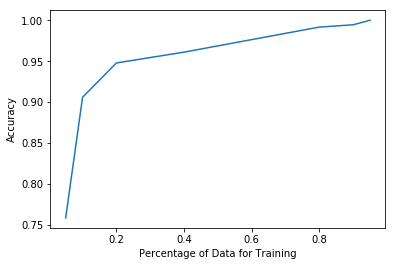

In [9]:
train_pcts = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95]
acc_train = []

for item2 in train_pcts:
    num3 = Numbers2(item2)
    score_trains = np.sum(num3.classify(5).diagonal()) / num3.classify(5).sum()
    acc_train.append(score_trains)
    
plt.plot(train_pcts, acc_train)
plt.xlabel("Percentage of Data for Training")
plt.ylabel("Accuracy")

#### 3.3b
TODO: Write description of influence of training / testing split
From the chart, we can see the accuracy increases drastically for low percentages of training data. However, this effect plateaus as the percentage of data used for training approaches higher values (>90%). This is likely due to the fact that as we increase our sample size we are given the opportunity to introduce more neighbors that could be closer to the point we are trying to estimate. As we reach a certain threshold, the training data will already have neighbors that are closest to the point we are trying to estimate, thus giving us a diminishing return on accuracy.